In [3]:
# Import libraries (these are tools we need)
import pandas as pd  # For working with data tables
import numpy as np   # For math operations
import matplotlib.pyplot as plt  # For making charts
import seaborn as sns  # For making pretty charts

# Set up so charts show nicely
%matplotlib inline
sns.set_style('whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [4]:
# Load the customers data
customers = pd.read_csv('../data/raw/olist_customers_dataset.csv')

# Look at the first 5 rows
print("Customer Data:")
customers.head()

Customer Data:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# How many customers do we have?
print(f"Total customers: {len(customers)}")

# What columns (information) do we have?
print("\nColumn names:")
print(customers.columns.tolist())

# Show basic info about the data
print("\nData info:")
customers.info()

Total customers: 99441

Column names:
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
# Load all datasets
orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')
products = pd.read_csv('../data/raw/olist_products_dataset.csv')
reviews = pd.read_csv('../data/raw/olist_order_reviews_dataset.csv')

print("All data loaded!")
print(f"Orders: {len(orders)} rows")
print(f"Order Items: {len(order_items)} rows")
print(f"Products: {len(products)} rows")
print(f"Reviews: {len(reviews)} rows")

All data loaded!
Orders: 99441 rows
Order Items: 112650 rows
Products: 32951 rows
Reviews: 99224 rows


In [7]:
# First, let's prepare the orders data
# Convert the purchase date from text to actual dates
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Look at the first few dates
print("First few order dates:")
print(orders['order_purchase_timestamp'].head())

First few order dates:
0   2017-10-02 10:56:33
1   2018-07-24 20:41:37
2   2018-08-08 08:38:49
3   2017-11-18 19:28:06
4   2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: datetime64[ns]


In [8]:
# Count how many orders per month
orders_per_month = orders.groupby(orders['order_purchase_timestamp'].dt.to_period('M')).size()

print("Orders per month:")
print(orders_per_month)

Orders per month:
order_purchase_timestamp
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64


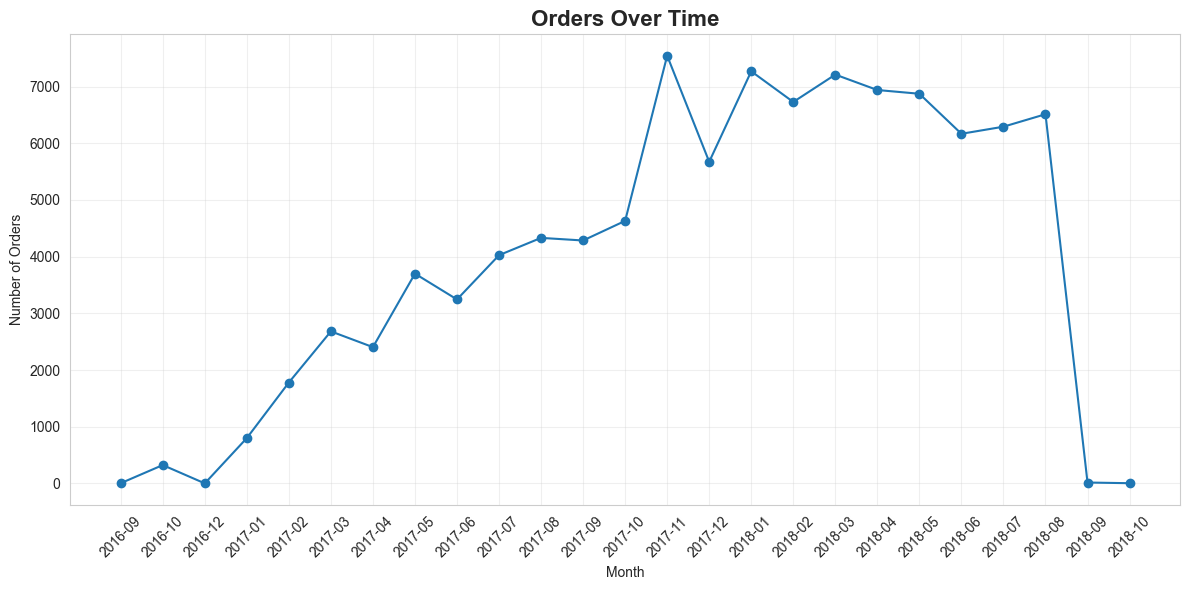

In [9]:
# Create a line chart
plt.figure(figsize=(12, 6))  # Make it wide
plt.plot(orders_per_month.index.astype(str), orders_per_month.values, marker='o')
plt.title('Orders Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Tilt the month labels so they fit
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
# Combine orders with order_items to get prices
# Think of this like a JOIN in Excel - matching rows by order_id
orders_with_price = orders.merge(order_items, on='order_id')

# Look at the result
print("Combined data:")
print(orders_with_price.head())
print(f"\nTotal rows: {len(orders_with_price)}")

Combined data:
                           order_id                       customer_id   
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d  \
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at   
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15  \
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date   
0          2017-10-04 19:55:00           2017-10-10 21:25:13  \
1          2018-07-26 14:31:00   

Monthly Revenue:
order_purchase_timestamp
2016-09        267.36
2016-10      49507.66
2016-12         10.90
2017-01     120312.87
2017-02     247303.02
2017-03     374344.30
2017-04     359927.23
2017-05     506071.14
2017-06     433038.60
2017-07     498031.48
2017-08     573971.68
2017-09     624401.69
2017-10     664219.43
2017-11    1010271.37
2017-12     743914.17
2018-01     950030.36
2018-02     844178.71
2018-03     983213.44
2018-04     996647.75
2018-05     996517.68
2018-06     865124.31
2018-07     895507.22
2018-08     854686.33
2018-09        145.00
Freq: M, Name: price, dtype: float64


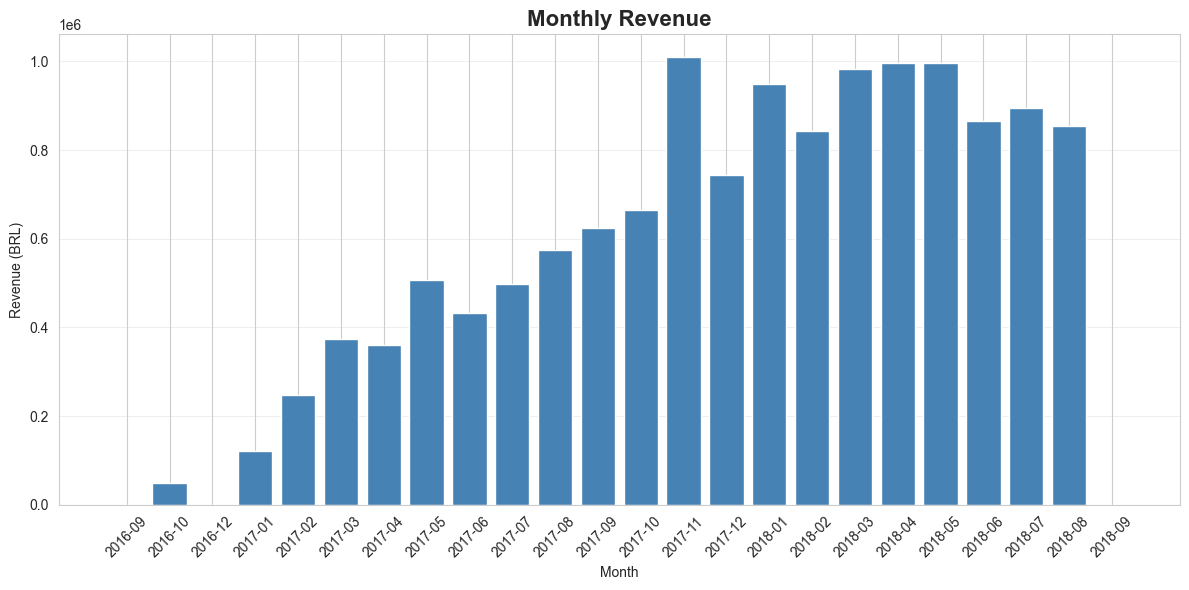


Total Revenue: R$ 13,591,643.70


In [11]:
# Calculate monthly revenue
# Group by month and sum all the prices
monthly_revenue = orders_with_price.groupby(
    orders_with_price['order_purchase_timestamp'].dt.to_period('M')
)['price'].sum()

print("Monthly Revenue:")
print(monthly_revenue)

# Make a chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_revenue.index.astype(str), monthly_revenue.values, color='steelblue')
plt.title('Monthly Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue (BRL)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate total revenue
total_revenue = monthly_revenue.sum()
print(f"\nTotal Revenue: R$ {total_revenue:,.2f}")